<a href="https://colab.research.google.com/github/LuisaUpegui/sales_predictions-/blob/main/sales_predictions_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales prediction 

Este proyecto tiene como objetivo realizar un modelo que prediga las ventas. 

# Exploración de datos.

Conocer el set de datos, ver que tipo de variables se tienen, si hay o no valores nulos, si los hay que hacer con ellos. Limpiar nuestro set y mirar que podria contestarse con este.

In [ ]:
from google.colab import drive #Dar acceso al drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



In [ ]:
import pandas as pd 
filename="/content/drive/MyDrive/Colab Notebooks/Coding dojo/sales-predictions/sales_predictions.csv"

In [ ]:
df=pd.read_csv(filename)

In [ ]:
 #¿Cuántas filas y columnas?  Hay 8523 filas y 12 columnas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#¿Cuáles son los tipos de datos en cada variable?
# Hay 4 columnas de tipo flotante, 1 columna con tipo de variable entero, y  7 columnas con tipo de variable categorica (object)

In [ ]:
#3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados. No hay valores duplicados 
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool>

In [ ]:
#4) Identifiquen los valores faltantes. Hay dos columnas con valores faltantes, la columna item_weight 
# y la columna outlet_size 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios,así que expliquen su elección).

In [ ]:
df[df["Item_Identifier"]== "FDP10"]



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [ ]:
#La columna "Item_Weighth" esta asociado con la columna "Item_Identifier", despues de hacer una busqueda se pudo encontrar
# que el item con  identificador FDP10 era el que presentaba valores faltantes pero algunas de sus filas estaban
#completamente llenas es por eso que para rellenar "Item_Weighth" se va a usar el valor puesto en el resto de filas el cual es 
# 19.0

df['Item_Weight'].fillna(19.0, inplace=True)



In [ ]:
#Para la columna "Outlet_Size" pasa algo similar al punto anterior pero esta vez hay una asociación entre la columna
# "Outlet_Size" y "Outlet_Type"== grosery store-->  según los datos puede inferirse que los datos faltantes 
# tienen valor a  'Small' ya que en esta solo hay estos dos valores (nan, 'Small')

In [ ]:
grosery = df["Outlet_Type"]=='Grocery Store'
df1 = df.loc[grosery, :]

In [ ]:
#Valores que toma 'Outlet_Size' filtrada por 'Grocery Store
df1['Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

In [ ]:
#Reemplazar los NA por "Small"
df['Outlet_Size'].fillna('Small', inplace=True)


In [ ]:
#6. Confirmar que no hay valores faltantes después de abordarlos
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#7. Encuentren y arreglen alguna categoría inconsistente de datos 
#La columna llamada Item_Fat_Content tiene LF, Low Fat y low fat (estandarizar por Low Fat) y 
#lo mismo para el valor Regular y reg
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
change={'low fat': 'Low Fat','Low Fat':'Low Fat', 'LF':'Low Fat',"reg":'Regular','Regular':'Regular' }

In [ ]:
df['Item_Fat_Content']= df['Item_Fat_Content'].map(change)

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
 #8. Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df['Item_Weight'].describe()


count    8523.000000
mean       13.912000
std         4.819264
min         4.555000
25%         9.310000
50%        14.500000
75%        19.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
df['Item_Visibility'].describe()


count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
df['Item_MRP'].describe()


count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [ ]:
df['Item_Outlet_Sales'].describe()


count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

# Análisis exploratorio de los datos 

Hacer un analisis de nuestro set de datos mediante visualizaciones. 

In [ ]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
import plotly.express as px



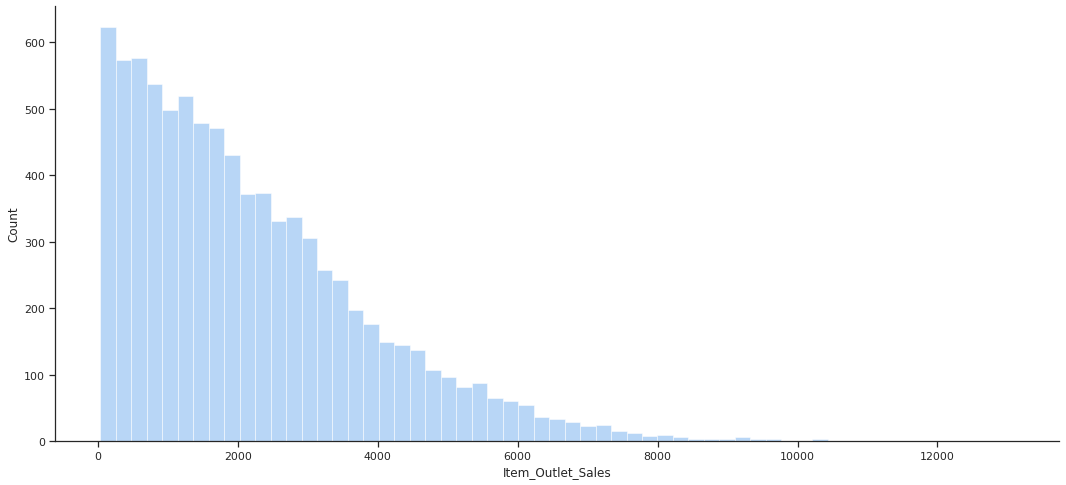

In [ ]:
#Vamos a evaluar la variable que queremos predecir, en este caso Item_Outlet_Sales

sns.set_theme(style="ticks", palette="pastel")

f, ax = plt.subplots(figsize=(18, 8))
sns.despine(f)

sns.histplot(
    df,
    x="Item_Outlet_Sales", 
    linewidth=.5,
)


In [ ]:
# Vamos a evaluar oblicuidad y kurtosis
# Oblicuidad/Skewness >0 nos indica que esta esta sesgada a la izquierda, como lo podemos ver en la gráfica 
# Kurtosis: tiene un valor de 1.6 nos indica que es una grafica platicurtica (achatada)
print('Skewness: %f'% df.Item_Outlet_Sales.skew())
print('Kurtosis: %f'% df.Item_Outlet_Sales.kurt())

Skewness: 1.177531
Kurtosis: 1.615877


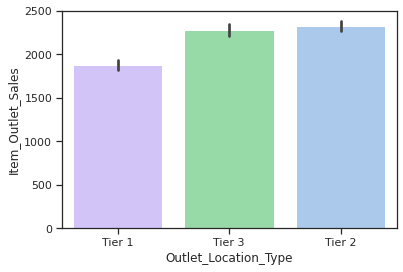

In [ ]:
# Promedio de ventas dado el tipo de locación 
# Este gráfico muestra como el tipo de locacion Tier dos vende en promedio más 
# que los otros dos, siendo Tier 1 el que vende menos.
# 
sns.set_theme(style="ticks", palette="pastel")

sns.barplot(data=df, x='Outlet_Location_Type', y="Item_Outlet_Sales", palette=["m", "g",'b'], ci=95,
        )
plt.show()


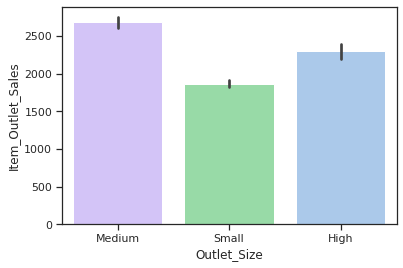

In [ ]:
# Promedio de ventas dado el tamaño de la tienda 
# En este podemos ver que el número de ventas promedio en la tienda de tamaño medio
# es mayor con respecto a los otros dos siendo Small el tamaño de tienda 
# el cual tiene el promedio de ventas más bajo
sns.set_theme(style="ticks", palette="pastel")

sns.barplot(data=df, x='Outlet_Size', y="Item_Outlet_Sales",palette=["m", "g",'b'] )


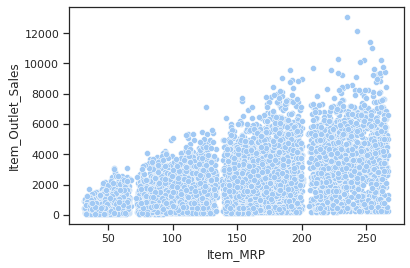

In [ ]:
## La variable Item_MRP parece tener relacion con la variable a predecir, lo que sugiere que puede ser de gran importancia 
# en la clasificación. Sin embargo la relacion no es del todo lineal y esto se debe a que hay presencia de outliers  
sns.set_theme(style="ticks", palette="pastel")

sns.scatterplot(data=df, x="Item_MRP", y="Item_Outlet_Sales")

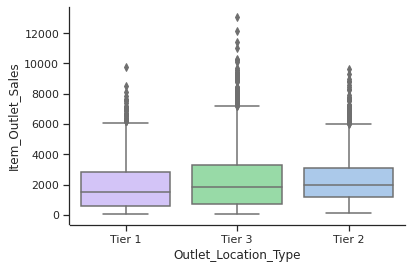

In [ ]:
## Este gráfico de box plot nos permite observar el a mayor tipo de area  las ventas de los productos
# toman valores mayores, ademas la distribucion de los valores en el tier 3 es mayor que en los otros tier 
# otra de las cosas que se puede observar es que para las tres categorias de tier hay outliers.

sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="Outlet_Location_Type", y="Item_Outlet_Sales",
           palette=["m", "g",'b'],
            data=df)
sns.despine(offset=1, trim= False)


In [ ]:
temp = df.reset_index().groupby(['Item_Type', 'Outlet_Size'])['Item_Outlet_Sales'].mean()


In [ ]:
temp = temp.reset_index()

In [ ]:
Filter=(temp[(temp.Item_Type=='Household') | (temp.Item_Type=='Dairy')])

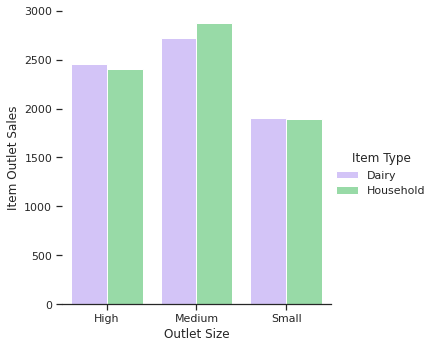

In [ ]:
# Barplot anidado:  Ventas de Dairy y House hold dado el tamaño de la tienda
# Este gráfico muestra como las ventas de ambos productos son mayores en las tiendas con tamaño medio
# y como en las tiendas de tamaño pequeño la venta de los productos disminuye. 
sns.set_theme(style="ticks", palette="pastel")

g = sns.catplot(
    data= Filter , kind="bar",
    x="Outlet_Size", y="Item_Outlet_Sales", hue="Item_Type", palette=["m", "g"]
)
g.despine(left=True)
g.set_axis_labels("Outlet Size", "Item Outlet Sales")
g.legend.set_title("Item Type")


In [ ]:
#¿Que tan correlacionados estan los datos ?

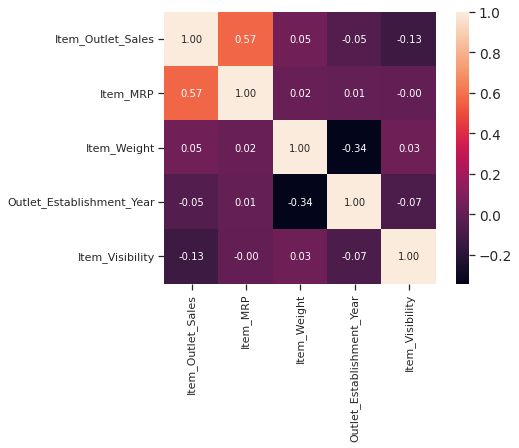

In [ ]:
# En esta matriz de correlación podemos ver que la unica variable numerica que tiene correlación con la variable a predecir
# es Item MRP esta correlación es positiva y de casi 0.6

corr = df.corr() 
k = 5 #number of variables for heatmap
plt.subplots(figsize=(7,5))
cols = corr.nlargest(k, 'Item_Outlet_Sales')['Item_Outlet_Sales'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

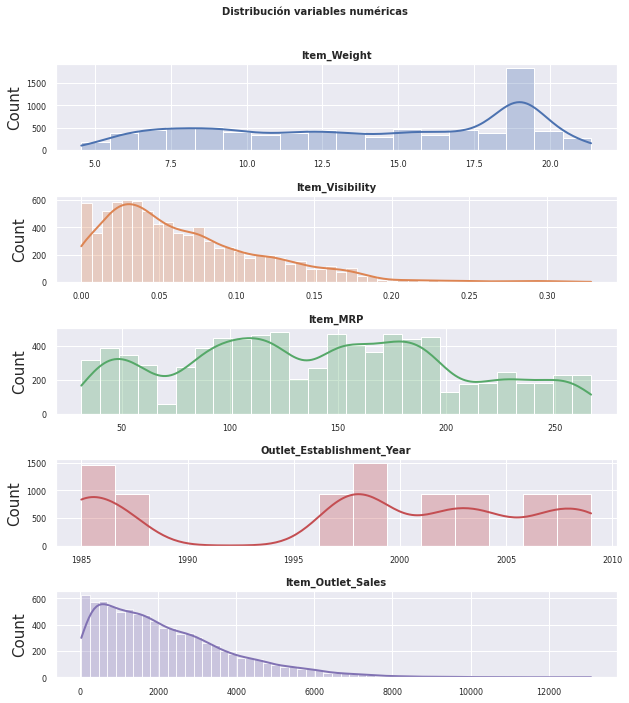

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(9, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Preprosesamiento

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler,OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import make_column_selector, make_column_transformer

In [ ]:
#Eliminar Item Outlet sales de la variable X, y aquellos que no son caracteristicas 
X = df.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
#Definir y como mi varible objeto, la que quiero predecir
y = df['Item_Outlet_Sales']

In [ ]:
y.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
#Realicen un train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [ ]:
#Inicializar transformadores
ordinal_encoder = OrdinalEncoder()
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [ ]:
#Inicializar pipelines 
num_pipe = make_pipeline(scaler)
ord_cat_pipe = make_pipeline(ordinal_encoder)
nom_cat_pipe = make_pipeline(ohe)

In [ ]:
num_tuple = (num_pipe, ['Item_Visibility', 'Item_MRP'])
ord_tuple = (ord_cat_pipe, ["Item_Fat_Content", "Outlet_Size"])
nom_tuple = (nom_cat_pipe, ["Item_Type","Outlet_Location_Type", "Outlet_Type"])

In [ ]:
#Inicializar las columnas transformer
preprocessor = make_column_transformer(num_tuple, ord_tuple, nom_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Visibility', 'Item_MRP']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type', 'Outlet_Location_Type',
                                  'Outlet_Type'])])

In [ ]:
#Eliminar Item Outlet sales de la variable X, y aquellos que no son caracteristicas 
#X = df.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
#Definir y como mi varible objeto, la que quiero predecir
#y = df['Item_Outlet_Sales']


In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Visibility', 'Item_MRP']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type', 'Outlet_Location_Type',
                                  'Outlet_Type'])])

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
X_train_processed


array([[ 0.17370855,  0.07024196,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.57073261,  0.29371474,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.14521605, -1.20851508,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.9118168 ,  1.53984693,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.2276652 , -0.37776029,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.9494918 , -0.73435323,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

# Regresión Lineal

In [ ]:
#Definir la reg de regresion lineal
reg = LinearRegression()

In [ ]:
#Ajustar el modelo 
reg.fit(X_train_processed,y_train)

LinearRegression()

In [ ]:
#  predicciones del conjunto de entrenamiento
reg_train_preds = reg.predict(X_train_processed)
#  predicciones del conjunto de prueba
reg_test_preds = reg.predict(X_test_processed)

In [ ]:
#R2 
#El R2 obtenido muestra que los datos de test se ajustan mejor al modelo, donde el 57% de los datos 
#se ajustan, sin embargo en los datos de entrenamiento este R2 disminuye un 0.01%
#
r2_train = r2_score(y_train, reg_train_preds)
r2_test = r2_score(y_test, reg_test_preds)
print(r2_train)
print(r2_test)

0.5613245999113186
0.5740866970459011


In [ ]:
#El error medio absoluto en el entrenamiento es de 839 indicando que en algunos casos el valor predicho se desvia en promedio 839 del valor real,
#el error medio absoluto para los datos de test disminuye un poco y toma el valor de 808 

mae_train = mean_absolute_error(y_train, reg_train_preds)
mae_test = mean_absolute_error(y_test, reg_test_preds)
print(mae_train)
print(mae_test)

839.4599745136037
808.8642839258092


In [ ]:
predictions=reg.predict(X_test_processed)

In [ ]:
#DataFrame de los valores reales y los valores predichos por el modelo
reg_preds = pd.DataFrame({'real_values':y_test, 'predictions':reg_test_preds})
reg_preds

#Este DataFrame nos muesta que para algunos valores el valor predicho varia un poco con respecto 
#al valor real, indicando que el modelo no aprende muy bien.

,real_values,predictions
7503,1743.0644,1341.293787
2957,356.8688,704.512439
7031,377.5086,827.922670
1084,5778.4782,4237.494522
856,2356.9320,3266.033183
...,...,...
7118,7190.6400,3777.515841
7364,3894.9300,2543.443405
4128,2428.8384,2450.467243
6440,1113.2176,985.725077


In [ ]:
reg_preds= reg_preds.head(25)

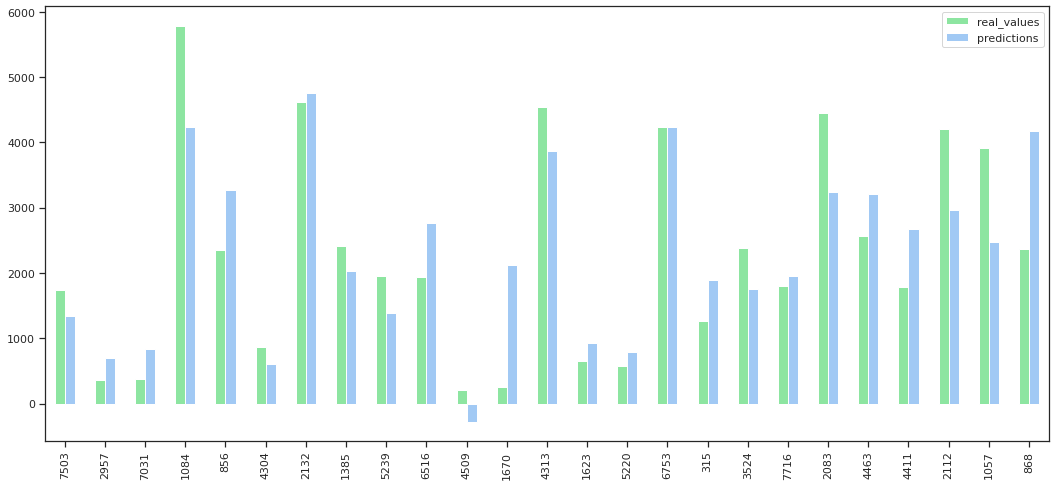

In [ ]:
#En este gráfico podemos ver de forma mas visual los valores reales vs las predicciones hechas por el modelo,
#algunos puntos los logra predecir bien o aproximadamente bien, sim embargo mucho otros varian mucho respecto al valor real 

sns.set_theme(style="ticks", palette="pastel")
plt.show()
reg_preds.plot(kind='bar',figsize=(18,8), color=('g','b'))
plt.grid(linewidth='2')
plt.grid(linewidth='2')
plt.grid(None)
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)


In [ ]:
dec_tree.fit(X_train_processed, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [ ]:
# El  r2 para los datos de prueba es de 1 sin embargo para el set de datos de entrenamiento este toma un valor a 0.15,
# este es un ejemplo sobreajuste donde los datos en el que el que los datos aprenden de caractersiticas especificas del 
# set de prueba que no logran predecir adecuadamente. 
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.15504658886073064


In [ ]:
#Vamos a tratar de ajustar el max_depth con la finalidad de mejorar el modelo 

# Lista de valores a probar para max_depth:
max_depth_range = list(range(5, 25))# will try every value between 2 and 25
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

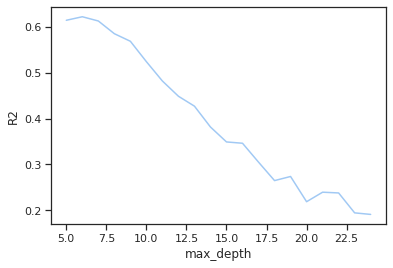

In [ ]:
#El gráfico muestra que el max_depth tiene un mejor R2 
#cuando este toma el valor de 5 
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');


In [ ]:
#Al cambiar el max_depth a 5 el R2 toma valores de 0.60 para los datos de entrenamientos 
#y 0.61 para los datos de test 
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.6022534362136622
0.6137706359844946


In [ ]:
t_train_preds = dec_tree_5.predict(X_train_processed)
t_test_preds = dec_tree_5.predict(X_test_processed)

In [ ]:
##El error medio absoluto en el entrenamiento arrojo un resultado  de 757 indicando que en algunos casos el valor predicho se desvia en promedio 757 del valor real,
#el error medio absoluto para los datos de test disminuye un poco y toma el valor de 728 
mae_train = mean_absolute_error(y_train, t_train_preds)
mae_test = mean_absolute_error(y_test, t_test_preds)
print(mae_train)
print(mae_test)

757.0754153928174
728.2873664679028


In [ ]:
#DataFrame de los valores reales y los valores predichos por el modelo
t_preds = pd.DataFrame({'real_values':y_test, 'predictions':t_test_preds})
t_preds

#Este DataFrame nos muesta que para algunos valores el valor predicho varia  con respecto 
#al valor real, indicando que el modelo no es lo suficientemente bueno. 

,real_values,predictions
7503,1743.0644,1071.091186
2957,356.8688,696.871576
7031,377.5086,696.871576
1084,5778.4782,4822.645477
856,2356.9320,2993.680429
...,...,...
7118,7190.6400,3939.567014
7364,3894.9300,2487.705376
4128,2428.8384,2487.705376
6440,1113.2176,696.871576


In [ ]:
t_preds= t_preds.head(25)

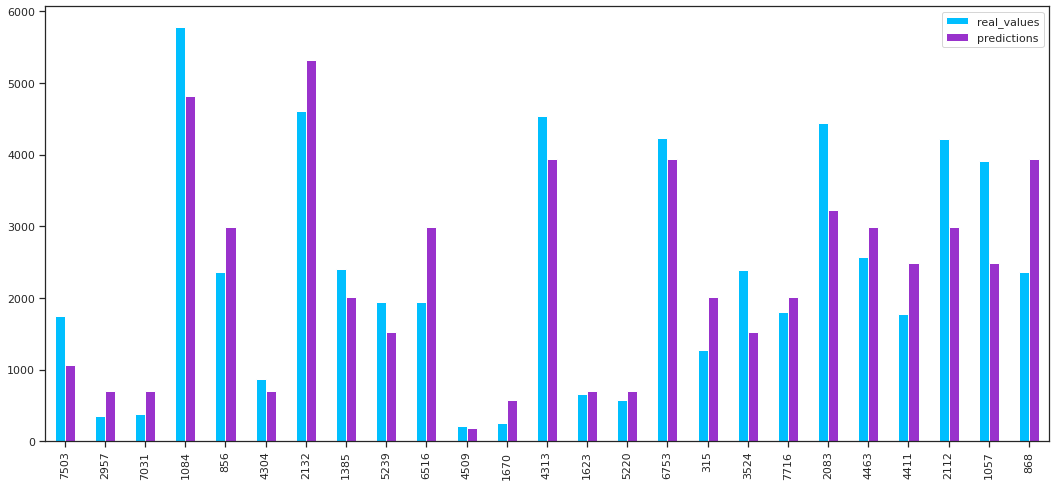

In [ ]:
#En este gráfico podemos ver de forma mas visual los valores reales vs las predicciones hechas por el modelo,
#algunos puntos los logra predecir bien o aproximadamente bien, sim embargo mucho otros varian mucho respecto al valor real 

sns.set_theme(style="ticks", palette="pastel")
plt.show()
t_preds.plot(kind='bar',figsize=(18,8), color=('deepskyblue','darkorchid'))
plt.grid(linewidth='2')
plt.grid(linewidth='2')
plt.grid(None)
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)

In [ ]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=76, n_estimators=400,
                      n_jobs=4)

In [ ]:
rf.predict(X_test_processed)

array([1274.05786842,  672.26272677,  667.67415641, 4589.22778731,
       3098.6121586 ,  595.90622497, 5920.54389945, 2048.60200479,
       1589.19154276, 2982.18162278,  225.97807268,  583.4368268 ,
       4026.47343319,  719.13698289,  809.65456422, 4234.18506036,
       1880.16621706, 1638.63879187, 2051.63337015, 3102.9057904 ,
       3088.02660599, 2601.14989111, 3132.35939897, 2422.7202351 ,
       4153.68123857, 1247.99451135,  350.75934638, 3862.2178692 ,
       3076.23871766, 3872.90583887,  721.33856487, 2858.82190843,
       2139.13355274, 3133.41267144,  358.97803402, 1348.6720065 ,
        721.19850041, 2064.81875381, 1290.13856211, 3156.56426497,
        180.16796496, 2078.05545503, 1408.07377152, 1462.59165593,
       2471.90469185, 1390.42917016,  792.3634346 ,  883.79926882,
       4125.87865951, 2077.90864945,  735.57662438, 2122.03419157,
        869.12560972,  123.40200833,  598.84457394, 1883.17626218,
       3105.50897116, 2067.69951479,  634.92945609, 3995.67885

In [ ]:
rf_train_preds = rf.predict(X_train_processed)
rf_test_preds = rf.predict(X_test_processed)

In [ ]:
train_score = rf.score(X_train_processed, y_train)
test_score = rf.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.6079598806025992
0.6215053499069114


In [ ]:
##El error medio absoluto en el entrenamiento arrojo un resultado  de 750 indicando que en algunos casos el valor predicho se desvia en promedio 757 del valor real,
#el error medio absoluto para los datos de test disminuye un poco y toma el valor de 721 
mae_train = mean_absolute_error(y_train, rf_train_preds)
mae_test = mean_absolute_error(y_test, rf_test_preds)
print(mae_train)
print(mae_test)

750.3166157232815
721.0366912813463


In [ ]:
#DataFrame de los valores reales y los valores predichos por el modelo
rf_preds = pd.DataFrame({'real_values':y_test, 'predictions':rf_test_preds})
rf_preds

#Este DataFrame nos muesta que para algunos valores el valor predicho varia  con respecto 
#al valor real, indicando que el modelo no es lo suficientemente bueno

,real_values,predictions
7503,1743.0644,1274.057868
2957,356.8688,672.262727
7031,377.5086,667.674156
1084,5778.4782,4589.227787
856,2356.9320,3098.612159
...,...,...
7118,7190.6400,3917.589977
7364,3894.9300,2434.465944
4128,2428.8384,2395.728569
6440,1113.2176,865.924904


In [ ]:
rf_preds= rf_preds.head(25)

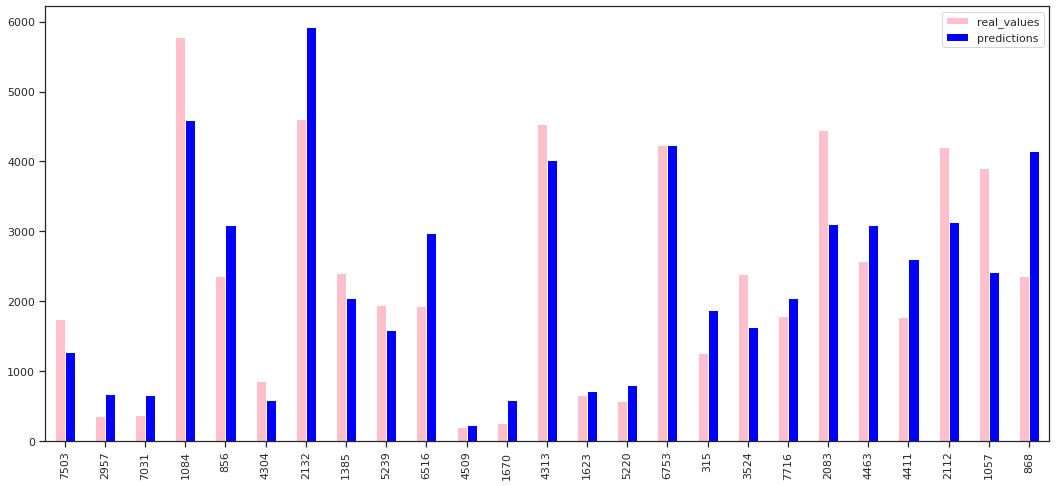

In [ ]:
#En este gráfico podemos ver de forma mas visual los valores reales vs las predicciones hechas por el modelo,
#algunos puntos los logra predecir bien o aproximadamente bien, sim embargo mucho otros varian mucho respecto al valor real 

sns.set_theme(style="ticks", palette="pastel")
plt.show()
rf_preds.plot(kind='bar',figsize=(18,8), color=('pink','blue'))
plt.grid(linewidth='2')
plt.grid(linewidth='2')
plt.grid(None)
plt.show()

# Conclusiones

Debido a que el objetivo de un modelo de regresión es minimizar el error cuadratico medio, es decir intentar predecir los valores de manera que este error sea el minimo posible; de los tres modelos propuestos el que mejor logra esto es el Random Forest ya que el error medio absoluto en este fue de 721, lo cual indica que en promedio el valor predicho se aleja del valor real en 721 unidades.

Cabe resaltar que el R2 y el error medio absoluto para los tres modelos no vario mucho y en general, esto puede deberse a que la naturaleza de los datos no es la mejor.

